5
8
12


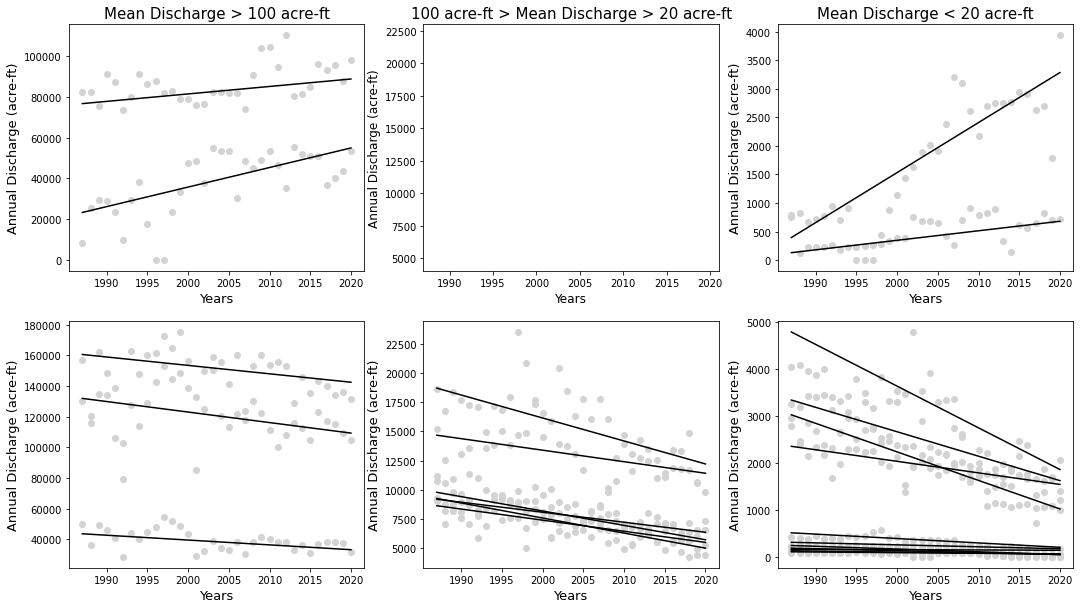

In [ ]:
## ---------------------------- ##
## CREATING FIGURES FOR RESULTS ## 
## ---------------------------- ##

## Change in Annual Volume Trends: 
figure, ax = plt.subplots(2, 3, figsize = (18,10))
year_slope = np.arange(0,34,1)
text = 'No increasing diversions'

for i in range(len(canals)):
  canal = base_stats.loc[i]
  ann_tots = totals[:,i]
  if canal['Mean Discharge(cfs)'] > 50 and canal['AnnualTrend'] == 'increasing':
    ax[0][0].plot(years, ann_tots, 'o', color='lightgrey')
    ax[0][0].set_xlabel('Years', size = 13)
    ax[0][0].set_ylabel('Annual Discharge (acre-ft)', size=13)
    ax[0][0].set_title('Mean Discharge > 100 acre-ft', size=15)
  elif canal['Mean Discharge(cfs)'] > 50 and canal['AnnualTrend'] == 'decreasing':
    ax[1][0].plot(years, ann_tots, 'o', color='lightgrey')
    ax[1][0].set_xlabel('Years', size = 13)
    ax[1][0].set_ylabel('Annual Discharge (acre-ft)', size=13)
  elif canal['Mean Discharge(cfs)'] < 50 and canal['Mean Discharge(cfs)'] > 10 and canal['AnnualTrend'] == 'increasing':
    ax[0][1].plot(years, ann_tots, 'o', color='lightgrey')
    ax[0][1].set_xlabel('Years', size = 13)
    ax[0][1].set_ylabel('Annual Discharge (acre-ft)', size=13)
    ax[0][1].set_title('100 acre-ft > Mean Discharge > 20 acre-ft')
  elif canal['Mean Discharge(cfs)'] < 50 and canal['Mean Discharge(cfs)'] > 10 and canal['AnnualTrend'] == 'decreasing':
    ax[1][1].plot(years, ann_tots, 'o', color='lightgrey')
    ax[1][1].set_xlabel('Years', size = 13)
    ax[1][1].set_ylabel('Annual Discharge (acre-ft)', size=13)
  elif canal['Mean Discharge(cfs)'] < 10 and canal['AnnualTrend'] == 'increasing':
    ax[0][2].plot(years, ann_tots, 'o', color='lightgrey')
    ax[0][2].set_xlabel('Years', size = 13)
    ax[0][2].set_ylabel('Annual Discharge (acre-ft)', size=13)
    ax[0][2].set_title('Mean Discharge < 20 acre-ft', size=15)
  elif canal['Mean Discharge(cfs)'] < 10 and canal['AnnualTrend'] == 'decreasing':
    ax[1][2].plot(years, ann_tots, 'o', color='lightgrey')
    ax[1][2].set_xlabel('Years', size = 13)
    ax[1][2].set_ylabel('Annual Discharge (acre-ft)', size=13)
  else: 
    ax[0][1].set_title('100 acre-ft > Mean Discharge > 20 acre-ft', size=15)
    ax[0][1].set_xlim([1987, 2021])
    ax[0][1].set_ylim([4000, 23000])
    ax[0][1].set_xlabel('Years', size=12)
    ax[0][1].set_ylabel('Annual Discharge (acre-ft)', size=12)
    # ax[0][1].text(1995, 17500, text)

for i in range(len(canals)):
  canal = base_stats.loc[i]
  if canal['Mean Discharge(cfs)'] > 50 and canal['AnnualTrend'] == 'increasing':
    ax[0][0].plot(years, (canal['Intercept']+canal['Slope(acre-ft)']*year_slope),color='black')
  elif canal['Mean Discharge(cfs)'] > 50 and canal['AnnualTrend'] == 'decreasing':
    ax[1][0].plot(years, (canal['Intercept']+canal['Slope(acre-ft)']*year_slope), color='black')
  elif canal['Mean Discharge(cfs)'] < 50 and canal['Mean Discharge(cfs)'] > 10 and canal['AnnualTrend'] == 'increasing':
    ax[0][1].plot(years, (canal['Intercept']+canal['Slope(acre-ft)']*year_slope))
  elif canal['Mean Discharge(cfs)'] < 50 and canal['Mean Discharge(cfs)'] > 10 and canal['AnnualTrend'] == 'decreasing':
    ax[1][1].plot(years, (canal['Intercept']+canal['Slope(acre-ft)']*year_slope), color='black')
  elif canal['Mean Discharge(cfs)'] < 10 and canal['AnnualTrend'] == 'increasing':
    ax[0][2].plot(years, (canal['Intercept']+canal['Slope(acre-ft)']*year_slope), color='black')
  elif canal['Mean Discharge(cfs)'] < 10 and canal['AnnualTrend'] == 'decreasing':
    ax[1][2].plot(years, (canal['Intercept']+canal['Slope(acre-ft)']*year_slope), color='black')
  else: 
    None
plt.savefig('datasets/diversion_timeseries/figures/results_discharge.svg')

notrend50 = []
notrend10 = []
notrend0 = []
for i in range(len(canals)):
  canal = mannkend_length.loc[i]
  vol = base_stats.loc[i]
  if vol['Mean Discharge(cfs)'] > 50 and canal['Trend'] == 'no trend':
    notrend50.append(canal)
  elif vol['Mean Discharge(cfs)'] < 50 and vol['Mean Discharge(cfs)'] > 10 and canal['Trend'] == 'no trend':
    notrend10.append(canal)
  elif vol['Mean Discharge(cfs)'] < 10 and canal['Trend'] == 'no trend':
    notrend0.append(canal)
  else: 
    None

print(len(notrend50))
print(len(notrend10))
print(len(notrend0))


In [ ]:
## Test if time series is stationary with Mann Kendall Test ##
## -------------------------------------------------------- ##

## Mann_Kendall Test : A nonparametric test often used to detect changes in streamflow

# Test if volume time series is stationary
# This is on the daily timeseries
outs = []

for i in range(len(canals)):
  canal = canals[i]
  input = np.array(canal['CFS'])
  test = mk.seasonal_test(input, period=365, alpha=0.05)
  trend, hyp, pval, slope = [test.trend, test.h, test.p, test.slope]
  outs.append([canal['DiversionName'][0], trend, hyp, pval, slope])

mannkend_out = pd.DataFrame(outs, columns = ['Name', 'Trend', 'Hypothesis', 'Pvalue', 'Slope'])
# display(mannkend_out)

# Test to see if annual volume time series is stationary 

annual_outs = []

for i in range(len(canals)):
  canal = canals[i]
  annual = totals[:,i]
  test = mk.original_test(annual, alpha = 0.05)
  trend, hyp, pval, slope, intercept = [test.trend, test.h, test.p, test.slope, test.intercept]
  annual_outs.append([canal['DiversionName'][0], trend, hyp, pval, slope, intercept])
  
mannkend_annual = pd.DataFrame(annual_outs, columns = ['Name', 'Trend', 'Hypothesis', 'Pvalue', 'Slope', 'Intercept'])
display(mannkend_annual)
mannkend_annual.to_csv('datasets/diversion_timeseries/figures/mannkend_annual.csv')

# Test if length of irrigation season time series is stationary

length_outs = []

for i in range(len(canals)):
  canal = season_df[i]
  input = np.array(canal['Range'][canal['Range'] != 'NaN'])
  test = mk.original_test(input, alpha=0.05)
  trend, hyp, pval, slope, intercept = [test.trend, test.h, test.p, test.slope, test.intercept]
  length_outs.append([canal['DiversionName'][0], trend, hyp, pval, slope, intercept])

mannkend_length = pd.DataFrame(length_outs, columns = ['Name', 'Trend', 'Hypothesis', 'Pvalue', 'Slope', 'Intercept'])

# Test if centroid time series is stationary

centroid_outs = []

for i in range(len(canals)):
  canal = centroid_df[i]
  input = np.array(canal['CentroidDay'])
  test = mk.original_test(input, alpha=0.05)
  trend, hyp, pval, slope = [test.trend, test.h, test.p, test.slope]
  centroid_outs.append([canal['DiversionName'][0], trend, hyp, pval, slope])

mannkend_centroid = pd.DataFrame(centroid_outs, columns = ['Name', 'Trend', 'Hypothesis', 'Pvalue', 'Slope'])




['BUBB CANAL']
['GRAHAM-GILBERT CANAL']
['LEMP CANAL']
['MACE-MACE CANAL']
['PENITENTIARY CANAL']
['SURPRISE_VALLEY_MICRON']
5
8
12


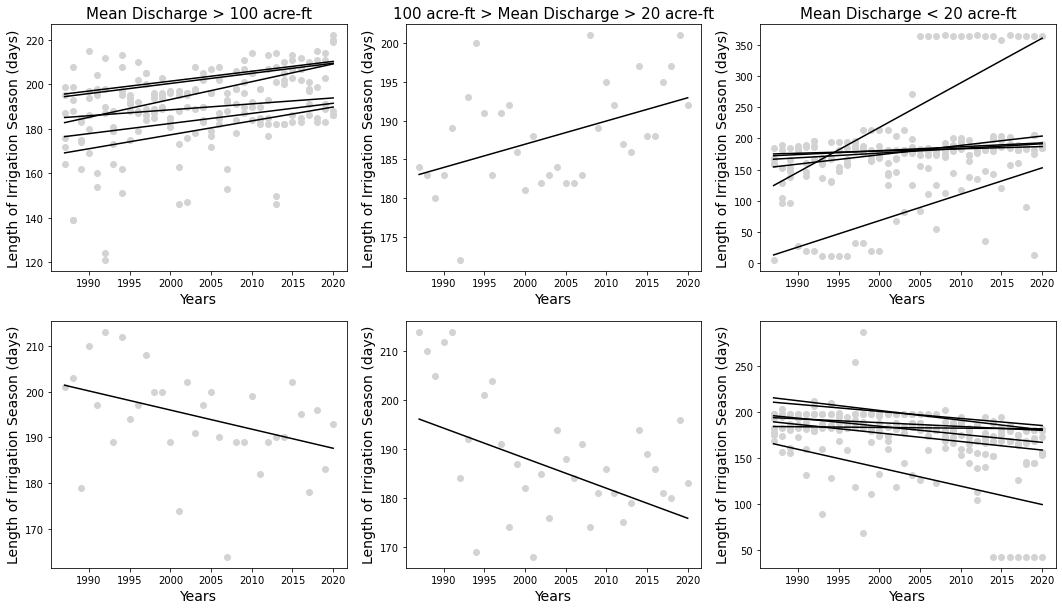

In [ ]:
## ----------------------------------------- ##
## CREATING FIGURES FOR MANN KENDALL RESULTS ## 
## ----------------------------------------- ##

# Separates stuff based on size and Mann Kendall outputs

figure, ax = plt.subplots(2, 3, figsize = (18,10))
year_slope = np.arange(0,34,1)
text = 'No increasing diversions'

for i in range(len(canals)):
  canal = mannkend_length.loc[i]
  vol = base_stats.loc[i]
  length = season_df[i]
  if vol['Mean Discharge(cfs)'] > 50 and canal['Trend'] == 'increasing':
    ax[0][0].plot(years, length['Range'], 'o', color='lightgrey')
    ax[0][0].set_xlabel('Years', size = 14)
    ax[0][0].set_ylabel('Length of Irrigation Season (days)', size=14)
    ax[0][0].set_title('Mean Discharge > 100 acre-ft', size=15)
  elif vol['Mean Discharge(cfs)'] > 50 and canal['Trend'] == 'decreasing':
    ax[1][0].plot(years, length['Range'], 'o', color='lightgrey')
    ax[1][0].set_xlabel('Years', size = 14)
    ax[1][0].set_ylabel('Length of Irrigation Season (days)', size=14)
  elif vol['Mean Discharge(cfs)'] < 50 and vol['Mean Discharge(cfs)'] > 10 and canal['Trend'] == 'increasing':
    ax[0][1].plot(years, length['Range'], 'o', color='lightgrey')
    ax[0][1].set_xlabel('Years', size = 14)
    ax[0][1].set_ylabel('Length of Irrigation Season (days)', size=14)
    ax[0][1].set_title('100 acre-ft > Mean Discharge > 20 acre-ft', size = 15)
  elif vol['Mean Discharge(cfs)'] < 50 and vol['Mean Discharge(cfs)'] > 10 and canal['Trend'] == 'decreasing':
    ax[1][1].plot(years, length['Range'], 'o', color='lightgrey')
    ax[1][1].set_xlabel('Years', size = 14)
    ax[1][1].set_ylabel('Length of Irrigation Season (days)', size=14)
  elif vol['Mean Discharge(cfs)'] < 10 and canal['Trend'] == 'increasing':
    ax[0][2].plot(years, length['Range'], 'o', color='lightgrey')
    ax[0][2].set_xlabel('Years', size = 14)
    ax[0][2].set_ylabel('Length of Irrigation Season (days)', size=14)
    ax[0][2].set_title('Mean Discharge < 20 acre-ft', size=15)
  elif vol['Mean Discharge(cfs)'] < 10 and canal['Trend'] == 'decreasing':
    ax[1][2].plot(years, length['Range'], 'o', color='lightgrey')
    ax[1][2].set_xlabel('Years', size = 14)
    ax[1][2].set_ylabel('Length of Irrigation Season (days)', size=14)
  else: 
    None

for i in range(len(canals)):
  canal = mannkend_length.loc[i]
  vol = base_stats.loc[i]
  if vol['Mean Discharge(cfs)'] > 50 and canal['Trend'] == 'increasing':
    ax[0][0].plot(years, (canal['Intercept']+canal['Slope']*year_slope), color='black')
  elif vol['Mean Discharge(cfs)'] > 50 and canal['Trend'] == 'decreasing':
    ax[1][0].plot(years, (canal['Intercept']+canal['Slope']*year_slope), color='black')
  elif vol['Mean Discharge(cfs)'] < 50 and vol['Mean Discharge(cfs)'] > 10 and canal['Trend'] == 'increasing':
    ax[0][1].plot(years, (canal['Intercept']+canal['Slope']*year_slope), color='black')
  elif vol['Mean Discharge(cfs)'] < 50 and vol['Mean Discharge(cfs)'] > 10 and canal['Trend'] == 'decreasing':
    ax[1][1].plot(years, (canal['Intercept']+canal['Slope']*year_slope), color='black')
  elif vol['Mean Discharge(cfs)'] < 10 and canal['Trend'] == 'increasing':
    print([canal['Name']])
    ax[0][2].plot(years, (canal['Intercept']+canal['Slope']*year_slope), color='black')
  elif vol['Mean Discharge(cfs)'] < 10 and canal['Trend'] == 'decreasing':
    ax[1][2].plot(years, (canal['Intercept']+canal['Slope']*year_slope), color='black')
  else: 
    None

plt.savefig('datasets/diversion_timeseries/figures/results_length.svg')

notrend50 = []
notrend10 = []
notrend0 = []
for i in range(len(canals)):
  canal = mannkend_length.loc[i]
  vol = base_stats.loc[i]
  if vol['Mean Discharge(cfs)'] > 50 and canal['Trend'] == 'no trend':
    notrend50.append(canal)
  elif vol['Mean Discharge(cfs)'] < 50 and vol['Mean Discharge(cfs)'] > 10 and canal['Trend'] == 'no trend':
    notrend10.append(canal)
  elif vol['Mean Discharge(cfs)'] < 10 and canal['Trend'] == 'no trend':
    notrend0.append(canal)
  else: 
    None

print(len(notrend50))
print(len(notrend10))
print(len(notrend0))
